# WebScraping with Selenium

This notebook shows how use selenium to scrape data from Indiegogo.com
The scope is only to understand the capabilities of web scraping and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver

<a href="https://colab.research.google.com/drive/1_WyM24eXWf-pdcqJKCcsb1pWwnbEWRi8?authuser=2#scrollTo=VYfg3I_fSt6e"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" ntotebook. In our local notebook we can remove the `--headless` option.  


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.indiegogo.com/explore/all?project_type=campaign&project_timing=all&sort=trending")
```



## [Advanced] How to use a proxy to hide our connection

RequestProxy is used to **hide** our connection...

In [ ]:
!pip install http-request-randomizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 7.6 MB/s 
     |████████████████████████████████| 128 kB 47.7 MB/s 
     |████████████████████████████████| 281 kB 38.7 MB/s 
     |████████████████████████████████| 62 kB 525 kB/s 
  Created wheel for http-request-randomizer: filename=http_request_randomizer-1.3.2-py3-none-any.whl size=33054 sha256=412c2e4626511afa74c7c2cc91949c798b91c25f20f34bae6240a16bdcafad51
  Stored in directory: /root/.cache/pip/wheels/6e/51/7c/2f01a661be62cc503bd5d1d4c7c39b2b5bce151c6bf6a7c644
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=97f9ad61a28f5223c0ed3f72b098e73b26a99b4d135f94006a9688635b420a36
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built http-request-randomizer fake-useragent
Traceback (most recent call last):
  File "/usr/

In [ ]:
from http_request_randomizer.requests.proxy.requestProxy import RequestProxy
req_proxy = RequestProxy()
proxies = req_proxy.get_proxy_list()

ModuleNotFoundError: ignored

In [ ]:
ind = [] #int is list of Italy proxy
for proxy in proxies:
    if proxy.country == 'Italy':
        ind.append(proxy)

PROXY = ind[0].get_address()
print(PROXY)

print(ind[0].country)

In [ ]:
# PROXY = '69.167.174.17:80'

In [ ]:
webdriver.DesiredCapabilities.CHROME['proxy']={
    "httpProxy":PROXY,
    "ftpProxy":PROXY,
    "sslProxy":PROXY,
    "proxyType":"MANUAL"
}

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


## First connection

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
import time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
#test

wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html") 
time.sleep(5) 
 
wd.save_screenshot('trip.png') 
 
buttons = wd.find_elements(by=By.CSS_SELECTOR,value='.nav.next.rndBtn.ui_button.primary.taLnk') 
 
len(buttons) 
#WebDriverWait(wd, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"css-1841bfu")))[1].click()

MaxRetryError: ignored

Populating the interactive namespace from numpy and matplotlib


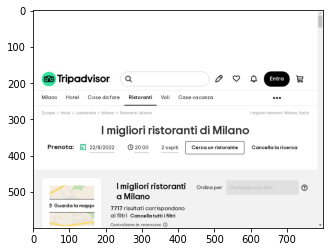

In [ ]:
 wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()


Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ration: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


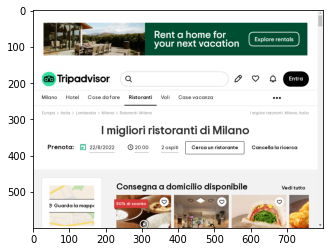

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [ ]:
print(wd.title)

I MIGLIORI 10 ristoranti a Milano - Aggiornamento di agosto 2022 - Tripadvisor


### First exercise with *Selenium*

Try it yourself... Print the contents of the page on the screen!

Complete the code and annotate the different behaviour. Try to use the attributes/methods applied to `wd`

- `page_source`
- `find_element_by_tag_name("body")`
- `find_element_by_tag_name("body").text`




In [ ]:
print(....)

### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements(by=By.CSS_SELECTOR, value='..')`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [ ]:
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(10)
list_titles = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
print(len(list_titles))

37


In [ ]:
print(list_titles[0].text)

### Exercise on *find_elements_by_css_selector*

Try to export the list of `div.discoverableCard-description` elements and show the content of the first element. Scope: get the description of the projects




In [ ]:
list_description = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
print(len(list_description))

37


# Project List from Indiegogo

Let's begin to download the list of projects.

The list of projects is defined by the css selection rule
`discoverable-card`



In [ ]:
list_projects = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
print(len(list_projects))

37


Gread! We find 12 project!

Now, we will extract the attribute from each single element.
The scope is to create one dict for each project in the list with the attribute:


1.   url
2.   title
3.   description
4.   category
5.   progress



In [ ]:
import pprint
detail_projects = []
for project in list_projects:
    url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
    recensione = ""
  
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url

    detail_projects.append({'url': url,
                            'title': title,
                            'recensione': recensione,
                            'restaurant_id': restaurant_id})

len(detail_projects)
pprint.pprint(detail_projects[0:5])

[{'recensione': '27 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23934354-Reviews-I_Barolisti-Milan_Lombardy.html',
  'title': 'I Barolisti',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23934354-Reviews-I_Barolisti-Milan_Lombardy.html'},
 {'recensione': '72 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html',
  'title': '1. Parea Bistrot',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html'},
 {'recensione': '758 recensioni',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html',
  'title': '2. Mabuhay Restaurant',
  'url': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html'},
 {'recensione': '214 recensioni',
  'restaurant_id': 'https://www.

Now let's try downloading all the ads on the front page...
and then move on to the second.

First we define a `parse_project` function to make the code cleaner and to reuse the function.

In [ ]:
def parse_project(project):
  url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
  recensione = ""
  try:
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url
  except:
    pass
  return {'url': url,
          'title': title,
          'recensione': recensione,
          'restaurant_id': restaurant_id}

Here's how to download the first page of projects...

In [ ]:
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
wd.save_screenshot(f'screenshot.png')
list_projects = wd.find_elements(by=By.CSS_SELECTOR, value="div.zdCeB.Vt.o")
for project in tqdm(list_projects):
  detail_projects.append(parse_project(project))

print(len(detail_projects))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/35 [00:00<?, ?it/s]

35


Have you seen the bookstore **tqdm**!
Find at this link all the documentation **https://github.com/tqdm/tqdm**:
is very useful to make our notebook more nice...

### How to end scraping?
Problem: When do we stop?

There are several ways. Some simpler and some more advanced:
- We can search inside the page for the ad number and divide it by 12
- We can check the status of the request (if (status_code == 200):... for a list of possible http status codes please check https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- We can check the number of ads found (if > 0...)
- Other more advanced techniques...

For example, in our case, let's go to verify the presence, or not, of the *Snow more* button inside the page. If present, we continue scraping, otherwise we stop.

Actually, we can also combine more than one of these techniques.



In [ ]:
for project in list_projects:
    url = project.find_elements(by=By.CSS_SELECTOR, value="a")[0].get_attribute("href")
    recensione = ""
  
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")) > 0):
      title = project.find_elements(by=By.CSS_SELECTOR, value=".Lwqic.Cj.b")[0].text
    if(len(project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")) > 0):
      recensione = project.find_elements(by=By.CSS_SELECTOR, value=".IiChw")[0].text
    restaurant_id = url

    detail_projects.append({'url': url,
                            'title': title,
                            'recensione': recensione,
                            'restaurant_id': restaurant_id})

In [ ]:
#Estrazione dei ristoranti fino a 50 pagine
import time
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(5)
wd.save_screenshot("check_browser.png")
for num in tqdm(range(1,50)): #50 pagine
  list_projects = wd.find_elements(by=By.CSS_SELECTOR, value=f"div.zdCeB.Vt.o")
  for project in list_projects:
    detail_projects.append(parse_project(project))   
  if (len(wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")) > 0):
    link = wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")[0].get_attribute("href")
    wd.get(link)
    time.sleep(2) 
  else: 
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
#Christian non usato
import time
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(5)
wd.save_screenshot("check_browser.png")
for num in tqdm(range(1,2)):   #30 pagine
  items = (num - 1) * 12
  list_projects = wd.find_elements(by=By.CSS_SELECTOR, value=f"div.zdCeB.Vt.o:nth-child(n+{items})")
  for project in list_projects:
    detail_projects.append(parse_project(project))
  if (len(wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")) > 0):
    wd.find_elements(by=By.CSS_SELECTOR, value=".nav.next.rndBtn.ui_button.primary.taLnk")[0].click()
    time.sleep(10)
    wd.save_screenshot("check_browser.png")
  else:
    break

In [ ]:
#Marco non usato
import time
detail_projects = []
wd.get("https://www.tripadvisor.it/Restaurants-g187849-Milan_Lombardy.html")
time.sleep(5)
wd.save_screenshot("check_browser.png")
for num in tqdm(range(1,30)):   #30 pagine
  items = (num - 1) * 36
  list_projects = wd.find_elements(by=By.CSS_SELECTOR, value=f"div.zdCeB.Vt.o:nth-child(n+{items})")
  for project in list_projects:
    detail_projects.append(parse_project(project))
  if (len(wd.find_elements(by=By.CSS_SELECTOR, value="a.nav.next")) > 0):
    wd.find_elements(by=By.CSS_SELECTOR, value="a.nav.next")[0].click()
    time.sleep(10)
    wd.save_screenshot("check_browser.png")
  else:
    break



In [ ]:
print(len(detail_projects))


1811


# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_projects)
ds_detail_projects.set_index("restaurant_id")
ds_detail_projects.head()

,url,title,recensione,restaurant_id
0,https://www.tripadvisor.it/Restaurant_Review-g...,South Garage Bistrot,9 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
1,https://www.tripadvisor.it/Restaurant_Review-g...,1. Parea Bistrot,72 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
2,https://www.tripadvisor.it/Restaurant_Review-g...,2. Mabuhay Restaurant,758 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
3,https://www.tripadvisor.it/Restaurant_Review-g...,3. Marea Seafood & Beverage,214 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...
4,https://www.tripadvisor.it/Restaurant_Review-g...,4. BLUE M Milano - Bottega Marchigiana,109 recensioni,https://www.tripadvisor.it/Restaurant_Review-g...


The `.info()` method provides an indication of the structure and data of the `DataFrame`.

In [ ]:
ds_detail_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            147 non-null    object
 1   title          147 non-null    object
 2   recensione     147 non-null    object
 3   restaurant_id  147 non-null    object
dtypes: object(4)
memory usage: 4.7+ KB


In [ ]:
ds_detail_projects.to_csv('ds_projectstriptestfinal.csv')

# Indiegogo Project pages ###

Now, the goal is to navigate and download the details of each project and pictures of the houses.

**Pandas** provides the *.read_csv* method that allows you to upload in CSV format files within a DataFrame.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projectstriptestfinal.csv", index_col="restaurant_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,recensione
restaurant_id,,,,
https://www.tripadvisor.it/Restaurant_Review-g187849-d23699716-Reviews-South_Garage_Bistrot-Milan_Lombardy.html,0,https://www.tripadvisor.it/Restaurant_Review-g...,South Garage Bistrot,9 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html,1,https://www.tripadvisor.it/Restaurant_Review-g...,1. Parea Bistrot,72 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html,2,https://www.tripadvisor.it/Restaurant_Review-g...,2. Mabuhay Restaurant,758 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d23650099-Reviews-Marea_Seafood_Beverage-Milan_Lombardy.html,3,https://www.tripadvisor.it/Restaurant_Review-g...,3. Marea Seafood & Beverage,214 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d15831930-Reviews-BLUE_M_Milano_Bottega_Marchigiana-Milan_Lombardy.html,4,https://www.tripadvisor.it/Restaurant_Review-g...,4. BLUE M Milano - Bottega Marchigiana,109 recensioni


***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projectstriptest.csv", index_col="restaurant_id")
ds_detail_projects.head()

,Unnamed: 0,url,title,recensione
restaurant_id,,,,
https://www.tripadvisor.it/Restaurant_Review-g187849-d12113433-Reviews-Soulgreen-Milan_Lombardy.html,0,https://www.tripadvisor.it/Restaurant_Review-g...,Soulgreen,568 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html,1,https://www.tripadvisor.it/Restaurant_Review-g...,1. Parea Bistrot,72 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html,2,https://www.tripadvisor.it/Restaurant_Review-g...,2. Mabuhay Restaurant,758 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d23650099-Reviews-Marea_Seafood_Beverage-Milan_Lombardy.html,3,https://www.tripadvisor.it/Restaurant_Review-g...,3. Marea Seafood & Beverage,214 recensioni
https://www.tripadvisor.it/Restaurant_Review-g187849-d15831930-Reviews-BLUE_M_Milano_Bottega_Marchigiana-Milan_Lombardy.html,4,https://www.tripadvisor.it/Restaurant_Review-g...,4. BLUE M Milano - Bottega Marchigiana,109 recensioni


In [ ]:
#non usato
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for project_id, project in ds_detail_projects.head().iterrows():
    time.sleep(10)
    link = project["url"]
    print(link)
    wd.set_window_size(1920, 1080)
    wd.get(link)
    try:
      WebDriverWait(wd, 10).until(
          EC.element_to_be_clickable((By.ID, "div.basicsBackerActions"))
      )
    except:
      continue

    wd.save_screenshot(f'screenshot_1.png')
    backers = wd.find_elements(by=By.CSS_SELECTOR, value=".basicsGoalProgress-claimedOrBackers")[0].text
    goal = wd.find_elements(by=By.CSS_SELECTOR, value=".basicsGoalProgress-progressDetails-detailsGoal-goalPercentageOrInitiallyRaised")[0].text
    left = wd.find_elements(by=By.CSS_SELECTOR, value=".basicsGoalProgress-progressDetails-detailsTimeLeft")[0].text
    location = wd.find_elements(by=By.CSS_SELECTOR, value=".basicsCampaignOwner-details-city")[0].text
    owner = wd.find_elements(by=By.CSS_SELECTOR, value=".campaignOwnerName-tooltip")[0].text
    details.append({'project_id': project_id,
                    'backers': backers,
                    'goal': goal,
                    'left': left,
                    'owner': owner,
                    'location': location})
  
len(details)
pprint.pprint(details)


In [ ]:
#Informazioni pagina di dettaglio
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
ds_detail_projects = ds_detail_projects.head(n = 1811)
for restaurant_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
    time.sleep(1)
    link = project["url"]
    indirizzo = ""
    valutazione = ""
    fascia_prezzo = ""
    #print(link)
    try:
      wd.set_window_size(1920, 1080)
      wd.get(link)
      indirizzo = wd.find_elements(by=By.CSS_SELECTOR, value="span.yEWoV")[0].text
      valutazione = wd.find_elements(by=By.CSS_SELECTOR, value="span.ZDEqb")[0].text
      fascia_prezzo = wd.find_elements(by=By.CSS_SELECTOR, value="div.SrqKb")[0].text
      
    except Exception as e:
      print(e)
    details.append({'restaurant_id': restaurant_id,
                    'indirizzo': indirizzo,
                    'valutazione': valutazione,
                    'fascia_prezzo': fascia_prezzo})
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/1811 [00:00<?, ?it/s]

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


In [ ]:
print(len(details))
pprint.pprint(details[0:4])

1811
[{'fascia_prezzo': '20 USD - 70 USD',
  'indirizzo': 'Via Eugenio Brizi 4, 20139 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d23699716-Reviews-South_Garage_Bistrot-Milan_Lombardy.html',
  'valutazione': '4,5 '},
 {'fascia_prezzo': 'Colazione, Pranzo, Cena',
  'indirizzo': 'Via Vigna 6, 20123 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d24167962-Reviews-Parea_Bistrot-Milan_Lombardy.html',
  'valutazione': '5,0 '},
 {'fascia_prezzo': '2 USD - 13 USD',
  'indirizzo': 'Bastioni di Porta Volta 9, 20121 Milano Italia',
  'restaurant_id': 'https://www.tripadvisor.it/Restaurant_Review-g187849-d17805000-Reviews-Mabuhay_Restaurant-Milan_Lombardy.html',
  'valutazione': '5,0 '},
 {'fascia_prezzo': 'Italiana, Pesce, Contemporanea, Mediterranea, Salutistica, '
                   'Ristoranti con bar',
  'indirizzo': 'Via Papa Gregorio XIV, 16, 20123 Milano Italia',
  'restaurant_id': 'https://www.tripadvis

Store the data with *pandas*

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("restaurant_id")
ds_details.head()

,restaurant_id,indirizzo,valutazione,fascia_prezzo
0,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Eugenio Brizi 4, 20139 Milano Italia","4,5",20 USD - 70 USD
1,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Vigna 6, 20123 Milano Italia","5,0","Colazione, Pranzo, Cena"
2,https://www.tripadvisor.it/Restaurant_Review-g...,"Bastioni di Porta Volta 9, 20121 Milano Italia","5,0",2 USD - 13 USD
3,https://www.tripadvisor.it/Restaurant_Review-g...,"Via Papa Gregorio XIV, 16, 20123 Milano Italia","5,0","Italiana, Pesce, Contemporanea, Mediterranea, ..."
4,https://www.tripadvisor.it/Restaurant_Review-g...,Via Lanzone 27 Sant'Ambrogio - Università Catt...,"5,0",10 USD - 40 USD


In [ ]:
ds_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  10 non-null     object
 1   indirizzo      10 non-null     object
 2   valutazione    10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [ ]:
ds_details.to_csv("ds_project_detailstriptestdetailsfinal.csv")

# Indiegogo Project images


Now we're going to download Indiegogo images for each project.

Our goal is to create a dataset of images and a `Dataframe` composed by:
- `project_id`
- `image_id`

We will use the library `requests`.

The `requests` library is python library for making HTTP requests.
It abstracts the complexities of making requests behind a simple API so that you can focus on interacting with services and consuming data in your application.

In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="project_id")
ds_detail_projects.head()

In [ ]:
import time
import requests

detail_projects = []
list_images = []
num = 0
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  num = num + 1
  try:
    list_images.append({"project_id": project_id,
                        "img_file": "img_" + str(num) + ".jpg"})
    src = project['image']
    img_file = requests.get(src, stream=True)
    if img_file.status_code == 200:
      with open("/content/images/img_" + str(num) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)



In [ ]:
print(len(list_images))

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

In [ ]:
ds_images.info()

In [ ]:
ds_images.to_csv("ds_images.csv")


In [ ]:
!zip -r "/content/images.zip" "/content/images/"


# API

Let's see how to use the **requests** library to hook APIs provided by our suppliers or colleagues.

## Crarifai

Let's try the services provided by Clarifai to increase the data we have available.


First, we need to install the `crarifai` python library.
For more details, please visit https://github.com/Clarifai/clarifai-python-grpc

To install the API client:


```
pip install clarifai-grpc
```






In [ ]:
##############################################################################
# Installation
##############################################################################

!pip install clarifai-grpc --upgrade



In [ ]:
##############################################################################
# Initialize client
##############################################################################

from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

channel = ClarifaiChannel.get_grpc_channel()

# Note: You can also use a secure (encrypted) ClarifaiChannel.get_grpc_channel() however
# it is currently not possible to use it with the latest gRPC version

stub = service_pb2_grpc.V2Stub(channel)

# This will be used by every Clarifai endpoint call.
metadata = (('authorization', 'Key 05a84c8d24f44480bb93b289ac5a8e53'),)

We will use the `predict_by_filename` method to obtain the **concepts** within the page.


In [ ]:
with open("/content/images/img_1.jpg", "rb") as f:
    file_bytes = f.read()

post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(
        model_id="aaa03c23b3724a16a56b629203edc62c",
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        base64=file_bytes
                    )
                )
            )
        ]
    ),
    metadata=metadata
)

if post_model_outputs_response.status.code != status_code_pb2.SUCCESS:
    raise Exception("Post model outputs failed, status: " + post_model_outputs_response.status.description)


In [ ]:
post_model_outputs_response

What type of data does that give us back?
Let's have a look!

In [ ]:
# Since we have one input, one output will exist here.
output = post_model_outputs_response.outputs[0]

print("Predicted concepts:")
for concept in output.data.concepts:
    print("%s %.2f" % (concept.name, concept.value))

In [ ]:
output

Now let's go and identify all the concepts for each image of each project.

In [ ]:
ds_images = pd.read_csv("ds_images.csv", index_col="project_id")

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    with open('/content/images/' + image['img_file'], "rb") as f:
      file_bytes = f.read()
    response = stub.PostModelOutputs(
        service_pb2.PostModelOutputsRequest(
            model_id="aaa03c23b3724a16a56b629203edc62c",
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    ).outputs[0]
    if(response.status.description == "Ok"):
      for concept in response.data.concepts:
          name = concept.name
          value = concept.value
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

print(len(img_details))

In [ ]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

In [ ]:
ds_img_details.info()

In [ ]:
ds_img_details.to_csv('ds_img_details.csv')

# Geocoding

What's geocoding?



Let's try to geolocalize the projects...

In [ ]:
import requests
import json
import pprint
import pandas as pd
from tqdm import tqdm_notebook as tqdm

address = "New Orleans, LA"
key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
response = requests.get(geocode_url)

import json
geo = json.loads(response.text)
pprint.pprint(response.text)

In [ ]:
print(geo['results'][0]['locations'][0]['latLng']['lat'])
print(geo['results'][0]['locations'][0]['latLng']['lng'])

In [ ]:
ds_projects = pd.read_csv("ds_project_details.csv", index_col="project_id")
ds_projects.info()

In [ ]:
ds_projects = pd.read_csv("ds_project_details.csv", index_col="project_id")

import time
project_location = []
for project_id, project in tqdm(ds_projects.iterrows(), total=ds_projects.shape[0]):
  address = project['location']
  if(address is None):
    print(str(project_id) + "- " + project['location'])
  else:
    key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
    try:
      geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
      response = requests.get(geocode_url)
      if(response.status_code == 200):
        geo = json.loads(response.text)
        lat = geo['results'][0]['locations'][0]['latLng']['lat']
        lng = geo['results'][0]['locations'][0]['latLng']['lng']
        project_location.append({
              "project_id": project_id,
              "lat": lat,
              "lng": lng
            })
    except Exception as e:
      print(e)
    

print(len(project_location))

In [ ]:
import pandas as pd
ds_project_location = pd.DataFrame(project_location)
ds_project_location.set_index("project_id")
ds_project_location.head(20)

In [ ]:
ds_project_location.info()

In [ ]:
ds_project_location.to_csv('ds_project_location.csv')

# Use API to get data from Indiegogo

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver

import requests
from tqdm import tqdm_notebook as tqdm
import pandas
import pprint
import pandas as pd
import json

In [ ]:
project_list = []
for page in tqdm(range(1, 100)):
  payload = {"sort": "most_funded",
            "category_main": None,
            "category_top_level": "Creative Works",
            "project_timing": "all",
            "project_type": "campaign",
            "tags":[],
            "page_num": page,
            "per_page": 100,
            "q": ""}
  r = requests.post('https://www.indiegogo.com/private_api/discover',
                  headers={'Content-type': 'application/json; charset=UTF-8', "User-Agent": "curl/7.64.1"},
                  json=payload)
  my_projects = r.json()['response']['discoverables']
  project_list.extend(my_projects)

In [ ]:
len(project_list)

In [ ]:
print(project_list[0:2])

In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(project_list)
ds_detail_projects.set_index("project_id")
ds_detail_projects.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ds_detail_projects.to_csv("/content/drive/MyDrive/indiegogo_2022/1_ds_project_details_full.csv")

In [ ]:
ds_detail_projects = pd.read_csv("/content/drive/MyDrive/indiegogo_2022/1_ds_project_details_full.csv", index_col="project_id")


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
import time
project_location = []
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  key = "r3xgNwBAviBMdOj4Op90kvyy2iO1CDGz"
  try:
    project_url = project["clickthrough_url"]
    wd.get(f"https://www.indiegogo.com/{project_url}")
    address = wd.find_elements(by=By.CSS_SELECTOR, value=".basicsCampaignOwner-details-city")[0].text
    geocode_url = f"http://www.mapquestapi.com/geocoding/v1/address?key={key}&location={address}"
    response = requests.get(geocode_url)
    if (response.status_code == 200):
      geo = json.loads(response.text)
      lat = geo['results'][0]['locations'][0]['latLng']['lat']
      lng = geo['results'][0]['locations'][0]['latLng']['lng']
      project_location.append({
            "project_id": project_id,
            "lat": lat,
            "lng": lng
          })
  except Exception as e:
    print(e)

In [ ]:
# project_location

In [ ]:
print(len(project_location))

In [ ]:
import pandas as pd
ds_project_location = pd.DataFrame(project_location)
ds_project_location.set_index("project_id")
ds_project_location.head(20)

In [ ]:
ds_project_location.to_csv("/content/drive/MyDrive/indiegogo_2022/2_ds_project_location_full.csv")

In [ ]:
!mkdir /content/drive/MyDrive/indiegogo_2022/images/

In [ ]:
detail_projects = []
list_images = []
num = 0
for project_id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
  num = num + 1
  try:
    list_images.append({"project_id": project_id,
                        "img_file": "img_" + str(num) + ".jpg"})
    src = project['image_url']
    img_file = requests.get(src, stream=True)
    if img_file.status_code == 200:
      with open("/content/drive/MyDrive/indiegogo_2022/images/img_" + str(num) + ".jpg", 'wb') as f:
        f.write(img_file.content)
  except Exception as e:
    print(e)

In [ ]:
# list_images

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("project_id")
ds_images.head()

In [ ]:
ds_images.to_csv("/content/drive/MyDrive/indiegogo_2022/3_ds_images_full.csv")

In [ ]:
# !pip install clarifai-grpc --upgrade

In [ ]:
from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import resources_pb2, service_pb2, service_pb2_grpc
from clarifai_grpc.grpc.api.status import status_pb2, status_code_pb2

channel = ClarifaiChannel.get_grpc_channel()

# Note: You can also use a secure (encrypted) ClarifaiChannel.get_grpc_channel() however
# it is currently not possible to use it with the latest gRPC version

stub = service_pb2_grpc.V2Stub(channel)

# This will be used by every Clarifai endpoint call.
metadata = (('authorization', 'Key 41a0bb727c0c462d8cd09aa359fa9649'),)

In [ ]:
!zip -r "/content/drive/MyDrive/indiegogo_2022/images_full.zip" "/content/drive/MyDrive/indiegogo_2022/images/"

In [ ]:
ds_images = pd.read_csv("/content/drive/MyDrive/indiegogo_2022/3_ds_images_full.csv", index_col="project_id")
ds_images.head()

In [ ]:

img_details = []
for project_id, image in tqdm(ds_images.iterrows(), total=ds_images.shape[0]):
  try:
    with open('/content/drive/MyDrive/indiegogo_2022/images/' + image['img_file'], "rb") as f:
      file_bytes = f.read()
    response = stub.PostModelOutputs(
        service_pb2.PostModelOutputsRequest(
            model_id="aaa03c23b3724a16a56b629203edc62c",
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            base64=file_bytes
                        )
                    )
                )
            ]
        ),
        metadata=metadata
    ).outputs[0]
    print(response.status)
    if(response.status.description == "Ok"):
      for concept in response.data.concepts:
          name = concept.name
          value = concept.value
          img_details.append({
            "project_id": project_id,
            "image": image['img_file'],
            "name": name,
            "value": value
          })
  except Exception as e:
    print(e)

In [ ]:
# img_details

In [ ]:
import pandas as pd
ds_img_details = pd.DataFrame(img_details)
ds_img_details.set_index("image")
ds_img_details.head()

In [ ]:
ds_img_details.to_csv('/content/drive/MyDrive/indiegogo_2022/4_ds_img_details_full.csv')